# Latent Semantic Analysis - Solutions

In this tutorial we will be working with the transcriptions of general debates at the United Nations from 1970 to 2016. We will try to see whether the fall of the iron curtain changed the debates.

For now, we'll just focus on the representation of the general debeates using various methods.

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install numpy
    !pip install scikit-learn
    !pip install seaborn
    !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from matplotlib import pyplot as plt

## Seed

In [3]:
seed = 42

## Read the Data
Read in the pre-processed 03.1 un-general-debates.csv file and set it to a data frame called df.

In [4]:
df = pd.read_csv('Data/03.1 un-general-debates.csv')

Use info on df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   session   7507 non-null   int64 
 1   year      7507 non-null   int64 
 2   country   7507 non-null   object
 3   text      7507 non-null   object
 4   document  7507 non-null   object
dtypes: int64(2), object(3)
memory usage: 293.4+ KB


Check the head of ad_data

In [6]:
df.head()

,session,year,country,text,document
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,indeed pleasure member delegation extend ambas...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",may begin congratulate sir election presidency...
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",mr president particular pleasure behalf delega...
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,debate fortieth session general assembly four ...
4,44,1989,ZWE,﻿I should like at the outset to express my del...,like outset express delegation satisfaction pl...


## Exercise 1 - Write a function to conduct the Latent Semantic Analysis

**Note:** In order to conduct the analysis, we must specify the grams. For now, we'll use uni-grams.


Latent Semantic Analysis

In [7]:
def latent_semantic_analysis(statements, components, max_value, min_value, seed):
    
    """
    This function is used to conduct a Latent Semantic Analysis. 
    
    """
    
    #define the vectorizer
    tfidf = TfidfVectorizer(lowercase=False, 
                        stop_words=None,
                        ngram_range = (1, 1), 
                        max_df=max_value,
                        min_df=min_value
                       )
    
    #transform the statements to tf-idf
    tfidf_train_sparse = tfidf.fit_transform(statements)
    
    #build the data frame
    tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())
    
    #conduct singular value decomposition
    lsa_obj = TruncatedSVD(n_components=components, n_iter=10000, random_state=seed)
    
    tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
    Sigma = lsa_obj.singular_values_
    V_T = lsa_obj.components_.T
    
    term_concept_matrix = pd.DataFrame(data=V_T, 
                                 index = tfidf.get_feature_names_out(),
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])
    
    #get lsa
    lsa = pd.DataFrame(data=tfidf_lsa_data, columns = [f'Latent_concept_{r}' for r in range(0,len(tfidf_lsa_data[1]))])
    
    #get Sigma
    Sigma = pd.DataFrame(Sigma)
    Sigma = Sigma.rename(columns={0: 'Singular value'})
    Sigma.loc[:,'Latent concept'] = range(1,(len(Sigma)+1))
    
    return lsa, Sigma, V_T, term_concept_matrix
    

## Exercise 2 - Conduct the Latent Semantic Analysis

Not it's time to conduct the analysis.

In [8]:
lsa, Sigma, V_T, term_concept_matrix = latent_semantic_analysis(statements = df['document'], components = 10, max_value = 0.99, min_value=0.01, seed = seed)

In [9]:
lsa

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
0,0.554881,-0.032903,-0.002133,0.031993,-0.108352,0.112483,-0.077618,-0.009715,-0.059131,0.044968
1,0.499693,0.047973,-0.050048,-0.085079,-0.134836,-0.010019,-0.103324,-0.012214,-0.018649,-0.046059
2,0.550586,-0.104250,-0.057579,0.116052,-0.053990,-0.080634,-0.010119,-0.006381,-0.027700,0.028156
3,0.541691,-0.027255,-0.072904,-0.047020,0.038999,-0.101544,-0.054549,-0.131377,-0.073834,0.051014
4,0.583991,-0.128846,-0.129558,0.121065,-0.058621,-0.019540,-0.035543,0.120599,-0.041962,0.035307
...,...,...,...,...,...,...,...,...,...,...
7502,0.387250,0.128298,0.067829,-0.053441,-0.141071,0.047959,0.037258,-0.084076,-0.073282,0.015653
7503,0.405544,0.089504,-0.004670,0.034771,0.098020,-0.047545,0.036393,0.075865,0.007930,0.031743
7504,0.414119,0.067924,0.010097,0.114194,-0.002361,-0.074993,0.076740,0.007725,0.032602,0.088396
7505,0.388598,0.126202,0.114422,-0.075538,0.016453,-0.035398,0.030394,0.042551,0.028511,-0.023155


In [10]:
Sigma

,Singular value,Latent concept
0,39.192108,1
1,11.622826,2
2,8.368031,3
3,8.165781,4
4,7.706854,5
5,7.182242,6
6,6.759502,7
7,6.427801,8
8,5.991450,9
9,5.737431,10


In [11]:
V_T

array([[ 0.01237548,  0.0076378 ,  0.00221426, ...,  0.01817986,
        -0.00945793,  0.00292083],
       [ 0.00501658,  0.01772614,  0.01181597, ...,  0.00079045,
         0.000498  , -0.00551912],
       [ 0.00468407,  0.01816623, -0.00149787, ..., -0.00063451,
        -0.00965726, -0.03170934],
       ...,
       [ 0.00138708, -0.00690336,  0.00489988, ...,  0.0013531 ,
         0.00186808, -0.00233997],
       [ 0.01826618, -0.02480951,  0.00585036, ..., -0.01959778,
         0.00186851,  0.00848646],
       [ 0.00150151,  0.00205873, -0.00128361, ..., -0.00177745,
         0.00113699,  0.00372752]])

## Exercise 3 - Vizualize the Latent Semantic Analysis

Now, it's time to cisualize the Latent Semantic Analysis results.

Visualize Sigma as a barplot

Visualize V_T as the top tokens along the latent concept

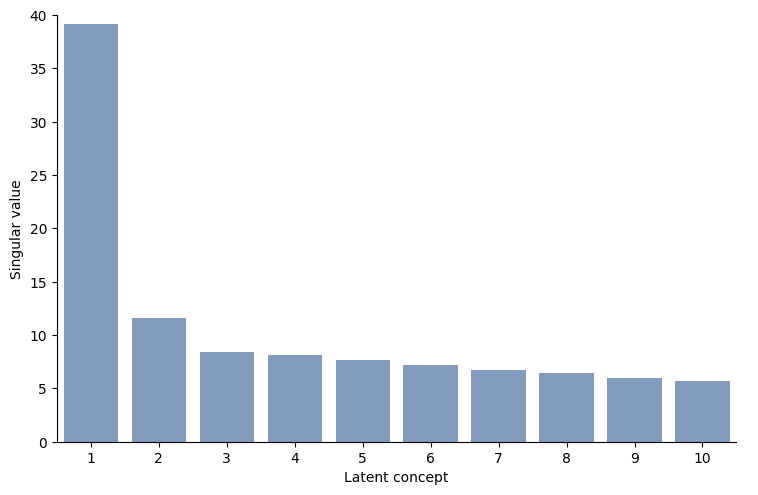

In [12]:
#Visualize Sigma
g = sns.catplot(data = Sigma,
            kind="bar",
            x='Latent concept',
            y='Singular value',
            color= '#7998C9',
            height=5, aspect=1.5,
)
g.set(xlabel='Latent concept')
g.set(ylabel='Singular value')
g.set(ylim=(0, 40))

Visualize V_T

In [13]:
def plot_latent_concept(term_concept_matrix, number_of_latent_concept, number_of_tokens):
    
    """
    This function is used to plot the latent concepts. 
    
    """
    
    #define the data
    top = pd.DataFrame(term_concept_matrix[f'Latent_concept_'+str(number_of_latent_concept)].sort_values(ascending=False)[:number_of_tokens])
    
    #get the tokens
    top.loc[:,'Token'] = top.index.values.astype(str)
    
    #plot
    g = sns.catplot(data = top,
            kind="bar",
            x='Latent_concept_'+str(number_of_latent_concept),
            y='Token',
            color= '#7998C9',
            height=5, aspect=1.5,
    )
    g.set(xlabel='Singular value')
    g.set(ylabel=None)
    g.set(xlim=(0, 1))
    #g.figure.savefig(path + '/Figures/Figure_'+'Latent_concept_'+str(number_of_latent_concept)+'.pdf', dpi = 300)
    
    
    return g

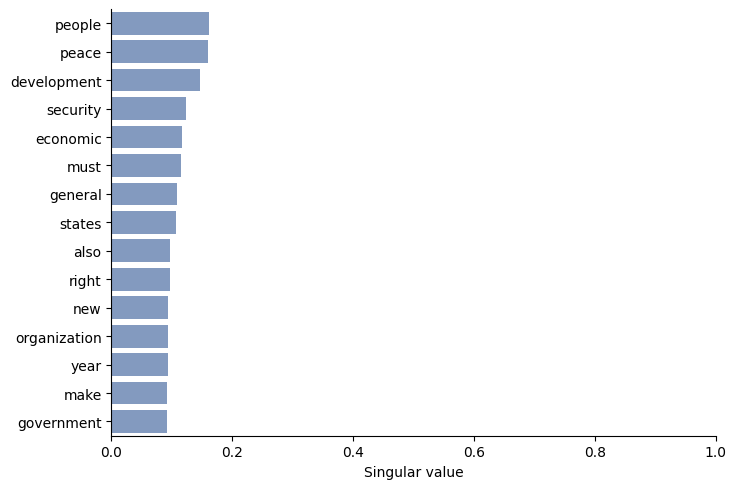

In [50]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=0,number_of_tokens=15)

## Exercise 4 - Add Analysis to Data Frame and visualize the latent concept over time

Add Analysis to Data Frame

In [15]:
df = pd.concat([df,lsa], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session           7507 non-null   int64  
 1   year              7507 non-null   int64  
 2   country           7507 non-null   object 
 3   text              7507 non-null   object 
 4   document          7507 non-null   object 
 5   Latent_concept_0  7507 non-null   float64
 6   Latent_concept_1  7507 non-null   float64
 7   Latent_concept_2  7507 non-null   float64
 8   Latent_concept_3  7507 non-null   float64
 9   Latent_concept_4  7507 non-null   float64
 10  Latent_concept_5  7507 non-null   float64
 11  Latent_concept_6  7507 non-null   float64
 12  Latent_concept_7  7507 non-null   float64
 13  Latent_concept_8  7507 non-null   float64
 14  Latent_concept_9  7507 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 879.9+ KB


Save the data as 03.1 un-general-debates

In [17]:
df.head()

,session,year,country,text,document,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,indeed pleasure member delegation extend ambas...,0.554881,-0.032903,-0.002133,0.031993,-0.108352,0.112483,-0.077618,-0.009715,-0.059131,0.044968
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",may begin congratulate sir election presidency...,0.499693,0.047973,-0.050048,-0.085079,-0.134836,-0.010019,-0.103324,-0.012214,-0.018649,-0.046059
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",mr president particular pleasure behalf delega...,0.550586,-0.104250,-0.057579,0.116052,-0.053990,-0.080634,-0.010119,-0.006381,-0.027700,0.028156
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,debate fortieth session general assembly four ...,0.541691,-0.027255,-0.072904,-0.047020,0.038999,-0.101544,-0.054549,-0.131377,-0.073834,0.051014
4,44,1989,ZWE,﻿I should like at the outset to express my del...,like outset express delegation satisfaction pl...,0.583991,-0.128846,-0.129558,0.121065,-0.058621,-0.019540,-0.035543,0.120599,-0.041962,0.035307


In [51]:
#calculate the mean
yearlyMean = df.groupby(['year'])['Latent_concept_0'].mean().reset_index()

In [52]:
yearlyMean

,year,Latent_concept_0
0,1970,0.486897
1,1971,0.482563
2,1972,0.483617
3,1973,0.485256
4,1974,0.486589
5,1975,0.501798
6,1976,0.501122
7,1977,0.497681
8,1978,0.509955
9,1979,0.498152


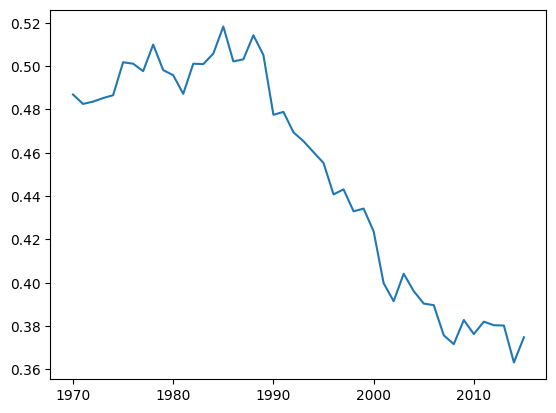

In [54]:
fig, ax = plt.subplots()
ax.plot(yearlyMean['year'], yearlyMean['Latent_concept_0'])

## Exercise 5 - Save the Data Frame

In [55]:
#excelfilename = "Data/04.1 un-general-debates.csv"
#df.to_csv(excelfilename,index=False)